In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
from matplotlib import cm
import matplotlib.colors as mcolors
import pandas as pd
import numpy as np
import requests
import time
from datetime import date
from pprint import pprint
import scipy.stats as st
import os.path
from os import path
import json


#country count
output_file = os.path.join("output_data", "country_player_count.csv")

#player details 
output_data_player_details_IN = "output_data/player_details_IN.csv"
output_data_player_details_GB = "output_data/player_details_GB.csv"
output_data_player_details_FR = "output_data/player_details_FR.csv"
output_data_player_details_BR = "output_data/player_details_BR.csv"
output_data_player_details_CA = "output_data/player_details_CA.csv"
output_data_player_details_DE = "output_data/player_details_DE.csv"
output_data_player_details_IT = "output_data/player_details_IT.csv"
output_data_player_details_ES = "output_data/player_details_ES.csv"
output_data_player_details_PL = "output_data/player_details_PL.csv"
output_data_player_details_RU = "output_data/player_details_RU.csv"


In [2]:
file = os.path.join("resources", "countries.csv")
countries_df = pd.read_csv(file)
countries_df.head()

country_name =[]
country_codes = []
player_count = []

for index, row in countries_df.iterrows():
    country_code = row["Code"]
    country = row["Country"]
    
    
    filepath = f'output_data/players_{country_code}.csv'
    
    if (path.exists(filepath)):
        players_df =  pd.read_csv(filepath)
              

        country_name.append(row["Country"])
        country_codes.append(row["Code"])
        player_count.append(len(players_df))

    
country_player_count_df = pd.DataFrame({"Country": country_name,
                                       "Country Code": country_codes,
                                        "Player Count": player_count})

count_sorted = country_player_count_df.sort_values("Player Count", ascending=False)
count_sorted_cleaned = count_sorted.loc[count_sorted["Player Count"] >= 1000]
count_sorted_cleaned = count_sorted_cleaned.reset_index(drop=True)
count_sorted_cleaned

,Country,Country Code,Player Count
0,India,IN,276922
1,United Kingdom of Great Britain and Northern I...,GB,192118
2,France,FR,176560
3,Brazil,BR,147040
4,Canada,CA,134687
...,...,...,...
109,Malta,MT,1397
110,Sudan,SD,1369
111,Nicaragua,NI,1317
112,Libya,LY,1180


In [3]:
count_sorted_cleaned.head(10)

,Country,Country Code,Player Count
0,India,IN,276922
1,United Kingdom of Great Britain and Northern I...,GB,192118
2,France,FR,176560
3,Brazil,BR,147040
4,Canada,CA,134687
5,Germany,DE,117887
6,Italy,IT,117604
7,Spain,ES,112180
8,Poland,PL,108111
9,Russian Federation,RU,103656


In [4]:
count_sorted_cleaned.to_csv(output_file, index=True, header=True)

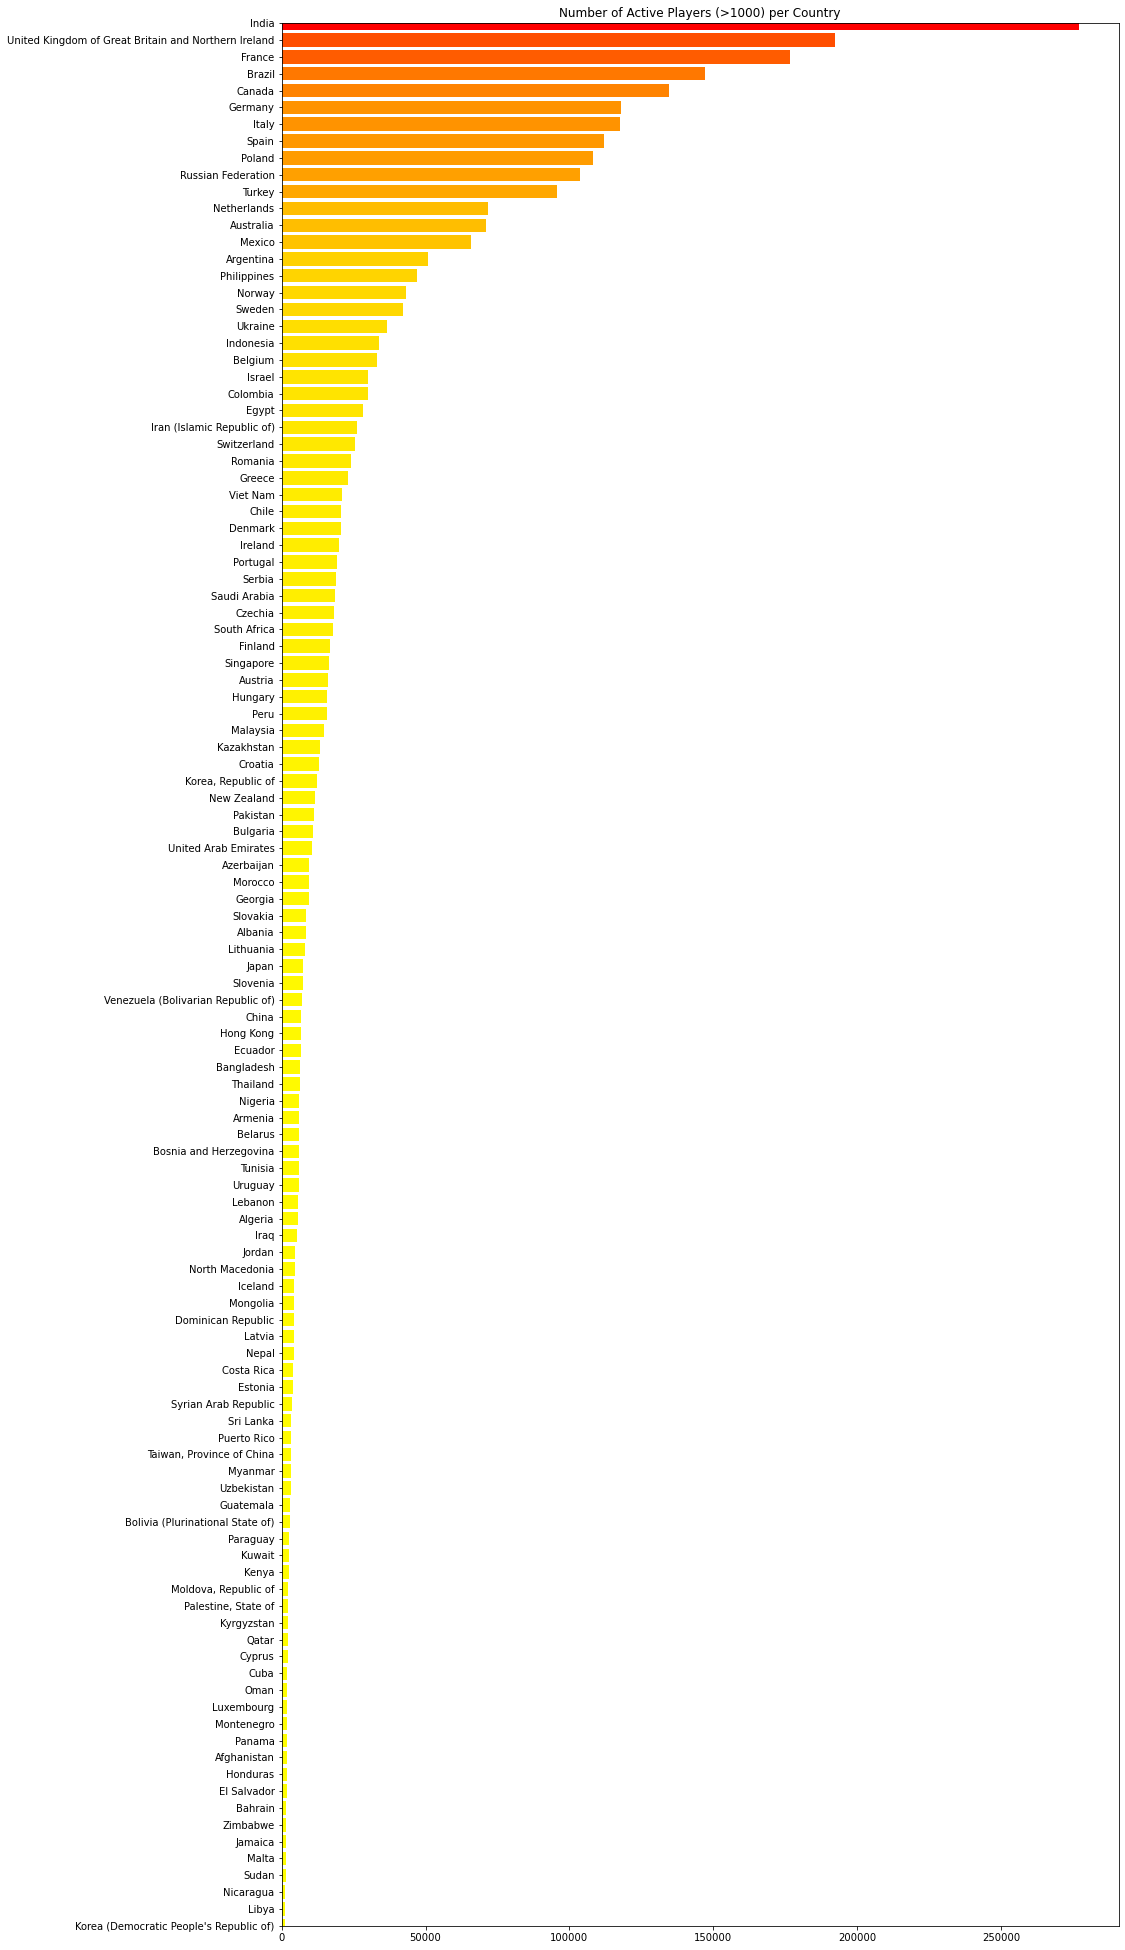

In [5]:
country = count_sorted_cleaned["Country"]
count = count_sorted_cleaned["Player Count"]

cmap = mcolors.LinearSegmentedColormap.from_list("", ["yellow", "red"])

fig = plt.figure(figsize=(15,35))
plt.barh(country, count, align='center', color=cmap(count.values/count.values.max()))
plt.ylim('India', "Korea (Democratic People's Republic of)")
plt.title("Number of Active Players (>1000) per Country")
plt.gca().invert_yaxis()
plt.savefig("figures/figure6_player_count", dpi=120)
plt.show()


In [6]:
#set country population csv file path & read csv
file = os.path.join('resources/country_population_data.csv')
population = pd.read_csv(file)
population

#Create data frame with countries and 2019 population 
current_pop = population["2019"]
country = population["Country Name"]
pop_df = pd.DataFrame({"Country": country, 
                       "Population (2019)": current_pop}) 

#Edit United Kingdom to match the country player count 
pop_df["Country"] = pop_df["Country"].str.replace("United Kingdom", 
                                                  "United Kingdom of Great Britain and Northern Ireland")
pop_df.head(10)

,Country,Population (2019)
0,Aruba,106314.0
1,Afghanistan,38041754.0
2,Angola,31825295.0
3,Albania,2854191.0
4,Andorra,77142.0
5,Arab World,427870270.0
6,United Arab Emirates,9770529.0
7,Argentina,44938712.0
8,Armenia,2957731.0
9,American Samoa,55312.0


In [7]:
#Merge country player count and country population data frames
chess_countries_merge = pop_df.merge(count_sorted_cleaned, on='Country')
chess_player_pop = chess_countries_merge.sort_values(by="Player Count", ascending=False).reset_index(drop=True)

chess_player_pop["Population (2019)"] = chess_player_pop["Population (2019)"].astype(int)
chess_player_pop.head(10)

,Country,Population (2019),Country Code,Player Count
0,India,1366417754,IN,276922
1,United Kingdom of Great Britain and Northern I...,66834405,GB,192118
2,France,67059887,FR,176560
3,Brazil,211049527,BR,147040
4,Canada,37589262,CA,134687
5,Germany,83132799,DE,117887
6,Italy,60297396,IT,117604
7,Spain,47076781,ES,112180
8,Poland,37970874,PL,108111
9,Russian Federation,144373535,RU,103656


In [8]:
#Percentage of country population on chess.com
chess_player_pop["Percent of Population"] = chess_player_pop["Player Count"]/chess_player_pop["Population (2019)"]
chess_player_pop["Percent of Population"] = chess_player_pop["Percent of Population"].map("{:,.2%}".format)
chess_player_pop.head(10)

,Country,Population (2019),Country Code,Player Count,Percent of Population
0,India,1366417754,IN,276922,0.02%
1,United Kingdom of Great Britain and Northern I...,66834405,GB,192118,0.29%
2,France,67059887,FR,176560,0.26%
3,Brazil,211049527,BR,147040,0.07%
4,Canada,37589262,CA,134687,0.36%
5,Germany,83132799,DE,117887,0.14%
6,Italy,60297396,IT,117604,0.20%
7,Spain,47076781,ES,112180,0.24%
8,Poland,37970874,PL,108111,0.28%
9,Russian Federation,144373535,RU,103656,0.07%


In [9]:
# get joined_yearmonth dataframe for player details file
def get_joined_yearmonth_dataframe(output_data_player_details):
    chessplayers_df = pd.read_csv(output_data_player_details)
    joined_dates = []
    joined_yearmonths = []
    joined_months = []
    for index, row in chessplayers_df.iterrows():        
        try:                  
            joined_date = time.strftime('%Y-%m-%d', time.localtime(row["joined"]))
            joined_month = time.strftime('%m', time.localtime(row["joined"]))
            joined_dates.append(joined_date)        
            joined_months.append(joined_month)        
        except: 
            print("unepxected error/skipping country")
    chessplayers_df["joined_date"] = joined_dates
    chessplayers_df["joined_month"] = joined_months
    chessplayers_df["joined_date"] = pd.to_datetime(chessplayers_df["joined_date"]).dt.strftime("%Y-%m-%d")
    chessplayers_df["joined_yearmonth"] = pd.to_datetime(chessplayers_df["joined_date"]).dt.strftime("%Y-%m")
    
    chessplayers_df.sort_values(by=["joined_yearmonth"])
    return chessplayers_df

In [10]:
#INDIA
chessplayers_IN_df = get_joined_yearmonth_dataframe(output_data_player_details_IN)

#UNITED KINGDOM
chessplayers_GB_df = get_joined_yearmonth_dataframe(output_data_player_details_GB)

#FRANCE
chessplayers_FR_df = get_joined_yearmonth_dataframe(output_data_player_details_FR)

# BRAZIL
chessplayers_BR_df = get_joined_yearmonth_dataframe(output_data_player_details_BR)

# CANADA
chessplayers_CA_df = get_joined_yearmonth_dataframe(output_data_player_details_CA)

#GERMANY
chessplayers_DE_df = get_joined_yearmonth_dataframe(output_data_player_details_DE)

#ITALY
chessplayers_IT_df = get_joined_yearmonth_dataframe(output_data_player_details_IT)

#SPAIN
chessplayers_ES_df = get_joined_yearmonth_dataframe(output_data_player_details_ES)

#POLAND
chessplayers_PL_df = get_joined_yearmonth_dataframe(output_data_player_details_PL)

# RUSSIA
chessplayers_RU_df = get_joined_yearmonth_dataframe(output_data_player_details_RU)


In [11]:
groupby_yearmonth_IN = chessplayers_IN_df.groupby(["joined_yearmonth"])
groupby_yearmonth_GB = chessplayers_GB_df.groupby(["joined_yearmonth"])
groupby_yearmonth_FR = chessplayers_FR_df.groupby(["joined_yearmonth"])
groupby_yearmonth_BR = chessplayers_BR_df.groupby(["joined_yearmonth"])
groupby_yearmonth_CA = chessplayers_CA_df.groupby(["joined_yearmonth"])
groupby_yearmonth_DE = chessplayers_DE_df.groupby(["joined_yearmonth"])
groupby_yearmonth_IT = chessplayers_IT_df.groupby(["joined_yearmonth"])
groupby_yearmonth_ES = chessplayers_ES_df.groupby(["joined_yearmonth"])
groupby_yearmonth_PL = chessplayers_PL_df.groupby(["joined_yearmonth"])
groupby_yearmonth_RU = chessplayers_RU_df.groupby(["joined_yearmonth"])


In [12]:
groupby_yearmonth_IN_count_df = groupby_yearmonth_IN["joined_yearmonth"].count()
groupby_yearmonth_GB_count_df = groupby_yearmonth_GB["joined_yearmonth"].count()
groupby_yearmonth_FR_count_df = groupby_yearmonth_FR["joined_yearmonth"].count()
groupby_yearmonth_BR_count_df = groupby_yearmonth_BR["joined_yearmonth"].count()
groupby_yearmonth_CA_count_df = groupby_yearmonth_CA["joined_yearmonth"].count()
groupby_yearmonth_DE_count_df = groupby_yearmonth_DE["joined_yearmonth"].count()
groupby_yearmonth_IT_count_df = groupby_yearmonth_IT["joined_yearmonth"].count()
groupby_yearmonth_ES_count_df = groupby_yearmonth_ES["joined_yearmonth"].count()
groupby_yearmonth_PL_count_df = groupby_yearmonth_PL["joined_yearmonth"].count()
groupby_yearmonth_RU_count_df = groupby_yearmonth_RU["joined_yearmonth"].count()
groupby_yearmonth_RU_count_df = groupby_yearmonth_PL["joined_yearmonth"].count()


In [13]:
#define data from 2019 and 2020
startdate2019 = pd.Timestamp(date.today().year-2, 1, 1)
enddate2019 = pd.Timestamp(date.today().year-1, 1, 1)

startdate2020 = pd.Timestamp(date.today().year-1, 1, 1)
enddate2020 = pd.Timestamp(date.today().year-1, 12, 31)

In [14]:
#INDIA DATAFRAME
chessplayers_IN_df["joined_date"] = pd.to_datetime(chessplayers_IN_df["joined_date"])

chessplayers_2020_IN_df = chessplayers_IN_df.loc[(chessplayers_IN_df["joined_date"] >= startdate2020) & (chessplayers_IN_df["joined_date"] < enddate2020)]
chessplayers_2020_IN_df

chessplayers_2019_IN_df = chessplayers_IN_df.loc[(chessplayers_IN_df["joined_date"] >= startdate2019) & (chessplayers_IN_df["joined_date"] < enddate2019)]
chessplayers_2019_IN_df

,player_index,player_id,username,title,followers,country,location,last_online,joined,status,is_streamer,joined_date,joined_month,joined_yearmonth
2,2,60969688,pthiru_503,NaN,0,IN,NaN,1610468560,1557829511,basic,False,2019-05-14,05,2019-05
3,3,56634864,vanshi_a,NaN,0,IN,NaN,1610433483,1548683907,basic,False,2019-01-28,01,2019-01
7,7,65493136,kunalsikand,NaN,7,IN,NaN,1610438061,1568467446,basic,False,2019-09-14,09,2019-09
42,42,59215996,deadpool398,NaN,1,IN,NaN,1610163251,1554000602,basic,False,2019-03-30,03,2019-03
60,60,56474498,alpha_zer000,NaN,383,IN,NaN,1610203271,1548355226,premium,False,2019-01-24,01,2019-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4944,4944,69598692,karthikey_schaudhary,NaN,34,IN,NaN,1610477973,1576822766,premium,False,2019-12-19,12,2019-12
4951,4951,60292522,djm25,NaN,0,IN,NaN,1610183088,1556345119,basic,False,2019-04-26,04,2019-04
4965,4965,66523600,vrushab07,NaN,5,IN,NaN,1610455266,1570736245,basic,False,2019-10-10,10,2019-10
4972,4972,68359506,atharvasoul,NaN,1,IN,NaN,1610471293,1574487699,basic,False,2019-11-22,11,2019-11


In [15]:
#UNITED KINGDOM DATAFRAME
chessplayers_GB_df["joined_date"] = pd.to_datetime(chessplayers_GB_df["joined_date"])

chessplayers_2020_GB_df = chessplayers_GB_df.loc[(chessplayers_GB_df["joined_date"] >= startdate2020) & (chessplayers_GB_df["joined_date"] < enddate2020)]
chessplayers_2020_GB_df

chessplayers_2019_GB_df = chessplayers_GB_df.loc[(chessplayers_GB_df["joined_date"] >= startdate2019) & (chessplayers_GB_df["joined_date"] < enddate2019)]
chessplayers_2019_GB_df

,player_index,player_id,username,title,followers,country,location,last_online,joined,status,is_streamer,joined_date,joined_month,joined_yearmonth
5,5,62338830,philmoore1,NaN,3,GB,NaN,1610469065,1560679638,basic,False,2019-06-16,06,2019-06
8,8,64230704,qrcids,NaN,5,GB,Calne,1610474081,1565632332,premium,False,2019-08-12,08,2019-08
38,38,68731318,dustygum,NaN,0,GB,NaN,1610463267,1575235454,basic,False,2019-12-01,12,2019-12
92,92,63438896,stargazer52,NaN,1,GB,NaN,1610442282,1563530858,basic,False,2019-07-19,07,2019-07
114,114,61161214,craggerb,NaN,0,GB,NaN,1610472904,1558235494,basic,False,2019-05-18,05,2019-05
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4940,4940,64416284,best_person_ever,NaN,26,GB,"London,UK",1610116158,1566062629,basic,False,2019-08-17,08,2019-08
4941,4941,69474320,dotgav,NaN,15,GB,NaN,1610494607,1576599687,premium,False,2019-12-17,12,2019-12
4952,4952,56110544,miketyson47,NaN,2,GB,NaN,1610467534,1547676025,premium,False,2019-01-16,01,2019-01
4975,4975,64991058,laddish,NaN,3,GB,NaN,1610467741,1567351660,basic,False,2019-09-01,09,2019-09


In [16]:
#FRANCE DATAFRAME
chessplayers_FR_df["joined_date"] = pd.to_datetime(chessplayers_FR_df["joined_date"])

chessplayers_2020_FR_df = chessplayers_FR_df.loc[(chessplayers_FR_df["joined_date"] >= startdate2020) & (chessplayers_FR_df["joined_date"] < enddate2020)]
chessplayers_2020_FR_df

chessplayers_2019_FR_df = chessplayers_FR_df.loc[(chessplayers_FR_df["joined_date"] >= startdate2019) & (chessplayers_FR_df["joined_date"] < enddate2019)]
chessplayers_2019_FR_df

,player_index,player_id,username,title,followers,country,location,last_online,joined,status,is_streamer,joined_date,joined_month,joined_yearmonth
5,5,62566826,bartman13,NaN,2,FR,NaN,1610153685,1561211311,basic,False,2019-06-22,06,2019-06
15,15,65365560,alain141,NaN,11,FR,NaN,1610475562,1568183538,premium,False,2019-09-10,09,2019-09
18,18,67662264,etiennec89,NaN,2,FR,NaN,1610462447,1573131405,basic,False,2019-11-07,11,2019-11
25,25,58314514,sharkezz,NaN,2,FR,NaN,1610401894,1552167736,premium,False,2019-03-09,03,2019-03
27,27,66596134,minniejulie,NaN,11,FR,NaN,1610493987,1570896399,basic,False,2019-10-12,10,2019-10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4966,4966,60791202,yuugi14,NaN,1,FR,NaN,1610352097,1557425675,basic,False,2019-05-09,05,2019-05
4974,4974,56740246,sebdvvv,NaN,23,FR,NaN,1610316749,1548886235,basic,False,2019-01-30,01,2019-01
4978,4978,67629946,guerito29,NaN,2,FR,NaN,1610446173,1573064592,basic,False,2019-11-06,11,2019-11
4989,4989,60943146,chacharlatant,NaN,4,FR,NaN,1610472023,1557766352,basic,False,2019-05-13,05,2019-05


In [17]:
#BRAZIL DATAFRAME
chessplayers_BR_df["joined_date"] = pd.to_datetime(chessplayers_BR_df["joined_date"])

chessplayers_2020_BR_df = chessplayers_BR_df.loc[(chessplayers_BR_df["joined_date"] >= startdate2020) & (chessplayers_BR_df["joined_date"] < enddate2020)]
chessplayers_2020_BR_df

chessplayers_2019_BR_df = chessplayers_BR_df.loc[(chessplayers_BR_df["joined_date"] >= startdate2019) & (chessplayers_BR_df["joined_date"] < enddate2019)]
chessplayers_2019_BR_df


,player_index,player_id,username,title,followers,country,location,last_online,joined,status,is_streamer,joined_date,joined_month,joined_yearmonth
6,6,61942732,georgemarins,NaN,1,BR,NaN,1610373904,1559744832,basic,False,2019-06-05,06,2019-06
8,8,66191048,rss_free,NaN,13,BR,NaN,1610414469,1570024960,basic,False,2019-10-02,10,2019-10
16,16,62122536,moreira743,NaN,1,BR,Mogi das Cruzes - SP,1610142963,1560173749,basic,False,2019-06-10,06,2019-06
23,23,64015424,acacito,NaN,10,BR,São Paulo,1610317238,1565071820,premium,False,2019-08-05,08,2019-08
27,27,63950210,nossila00,NaN,0,BR,Paiçandu - Pr,1610173670,1564892491,basic,False,2019-08-03,08,2019-08
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4968,4968,62907144,juniorespe,NaN,1,BR,NaN,1610405583,1562093817,basic,False,2019-07-02,07,2019-07
4973,4973,64678810,rianpatrickk,NaN,2,BR,NaN,1610368901,1566707556,basic,False,2019-08-24,08,2019-08
4982,4982,55403744,pauloberlese,NaN,6,BR,NaN,1610144709,1546379072,basic,False,2019-01-01,01,2019-01
4987,4987,65743217,lhbe7,NaN,6,BR,NaN,1610307851,1569016588,basic,False,2019-09-20,09,2019-09


In [18]:
#CANADA DATAFRAME
chessplayers_CA_df["joined_date"] = pd.to_datetime(chessplayers_CA_df["joined_date"])

chessplayers_2020_CA_df = chessplayers_CA_df.loc[(chessplayers_CA_df["joined_date"] >= startdate2020) & (chessplayers_CA_df["joined_date"] < enddate2020)]
chessplayers_2020_CA_df

chessplayers_2019_CA_df = chessplayers_CA_df.loc[(chessplayers_CA_df["joined_date"] >= startdate2019) & (chessplayers_CA_df["joined_date"] < enddate2019)]
chessplayers_2019_CA_df

,player_index,player_id,username,title,followers,country,location,last_online,joined,status,is_streamer,joined_date,joined_month,joined_yearmonth
5,5,61337250,uchihasasuke777,NaN,1,CA,NaN,1610308974,1558627376,basic,False,2019-05-23,05,2019-05
26,26,58656772,samiam63636,NaN,0,CA,NaN,1610305741,1552869629,basic,False,2019-03-17,03,2019-03
51,51,61598732,amazingtacothefirst,NaN,2,CA,NaN,1610308444,1559178972,basic,False,2019-05-29,05,2019-05
69,69,57694180,killaseason27,NaN,13,CA,NaN,1610316107,1550878632,basic,False,2019-02-22,02,2019-02
77,77,68807588,theob24,NaN,2,CA,NaN,1610301393,1575390100,basic,False,2019-12-03,12,2019-12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4928,4928,56449102,ugotugot,NaN,0,CA,NaN,1610319545,1548308489,premium,False,2019-01-23,01,2019-01
4935,4935,57081784,patron884,NaN,6,CA,NaN,1610311160,1549590464,basic,False,2019-02-07,02,2019-02
4946,4946,67943794,sirsheepadoodle,NaN,0,CA,NaN,1610255836,1573677350,basic,False,2019-11-13,11,2019-11
4956,4956,65079064,baconbitz80,NaN,8,CA,NaN,1610316886,1567565326,basic,False,2019-09-03,09,2019-09


In [19]:
#GERMANY DATAFRAME
chessplayers_DE_df["joined_date"] = pd.to_datetime(chessplayers_DE_df["joined_date"])

chessplayers_2020_DE_df = chessplayers_DE_df.loc[(chessplayers_DE_df["joined_date"] >= startdate2020) & (chessplayers_DE_df["joined_date"] < enddate2020)]
chessplayers_2020_DE_df

chessplayers_2019_DE_df = chessplayers_DE_df.loc[(chessplayers_DE_df["joined_date"] >= startdate2019) & (chessplayers_DE_df["joined_date"] < enddate2019)]
chessplayers_2019_DE_df

,player_index,player_id,username,title,followers,country,location,last_online,joined,status,is_streamer,joined_date,joined_month,joined_yearmonth
6,6,68392462,babyyoda13,NaN,2,DE,NaN,1610480248,1574552214,basic,False,2019-11-23,11,2019-11
9,9,64958254,lordschniedel,NaN,0,DE,NaN,1610395801,1567275521,premium,False,2019-08-31,08,2019-08
21,21,57183198,thomasfoc,NaN,9,DE,NaN,1610491144,1549801451,premium,False,2019-02-10,02,2019-02
24,24,68119204,michorot,NaN,1,DE,NaN,1610480954,1574022290,basic,False,2019-11-17,11,2019-11
27,27,55480426,grongoo,NaN,6,DE,NaN,1610377430,1546541200,basic,False,2019-01-03,01,2019-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4941,4941,61547084,shafi1992,NaN,4,DE,NaN,1610461527,1559069372,basic,False,2019-05-28,05,2019-05
4968,4968,64023678,batto2707,NaN,0,DE,NaN,1610103721,1565095681,basic,False,2019-08-06,08,2019-08
4971,4971,64055978,teaage,NaN,8,DE,NaN,1610485992,1565180706,basic,False,2019-08-07,08,2019-08
4979,4979,65028374,smabrain,NaN,5,DE,NaN,1610439961,1567443206,basic,False,2019-09-02,09,2019-09


In [20]:
#ITALY DATAFRAME
chessplayers_IT_df["joined_date"] = pd.to_datetime(chessplayers_IT_df["joined_date"])

chessplayers_2020_IT_df = chessplayers_IT_df.loc[(chessplayers_IT_df["joined_date"] >= startdate2020) & (chessplayers_IT_df["joined_date"] < enddate2020)]
chessplayers_2020_IT_df

chessplayers_2019_IT_df = chessplayers_IT_df.loc[(chessplayers_IT_df["joined_date"] >= startdate2019) & (chessplayers_IT_df["joined_date"] < enddate2019)]
chessplayers_2019_IT_df

,player_index,player_id,username,title,followers,country,location,last_online,joined,status,is_streamer,joined_date,joined_month,joined_yearmonth
15,15,56132886,armikkle,NaN,7,IT,NaN,1610494942,1547730777,basic,False,2019-01-17,01,2019-01
22,22,60004274,squared77,NaN,4,IT,NaN,1610462165,1555686747,basic,False,2019-04-19,04,2019-04
24,24,59501024,antoniofrontino,NaN,0,IT,NaN,1610396885,1554592202,basic,False,2019-04-06,04,2019-04
32,32,69604794,bernardeschi0,NaN,7,IT,NaN,1610234850,1576839019,basic,False,2019-12-20,12,2019-12
38,38,58650336,mmelzi,NaN,6,IT,NaN,1610440174,1552855052,basic,False,2019-03-17,03,2019-03
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4943,4943,58085140,francesco0427,NaN,4,IT,NaN,1610481786,1551715791,basic,False,2019-03-04,03,2019-03
4951,4951,55558708,iftulugnec,NaN,0,IT,NaN,1610455931,1546700680,basic,False,2019-01-05,01,2019-01
4958,4958,63796518,janker84,NaN,0,IT,NaN,1610404181,1564484568,basic,False,2019-07-30,07,2019-07
4962,4962,58331150,contemascetti22,NaN,1,IT,NaN,1610483453,1552209352,basic,False,2019-03-10,03,2019-03


In [21]:
#SPAIN DATAFRAME
chessplayers_ES_df["joined_date"] = pd.to_datetime(chessplayers_ES_df["joined_date"])

chessplayers_2020_ES_df = chessplayers_ES_df.loc[(chessplayers_ES_df["joined_date"] >= startdate2020) & (chessplayers_ES_df["joined_date"] < enddate2020)]
chessplayers_2020_ES_df

chessplayers_2019_ES_df = chessplayers_ES_df.loc[(chessplayers_ES_df["joined_date"] >= startdate2019) & (chessplayers_ES_df["joined_date"] < enddate2019)]
chessplayers_2019_ES_df

,player_index,player_id,username,title,followers,country,location,last_online,joined,status,is_streamer,joined_date,joined_month,joined_yearmonth
4,4,56906806,chandelier1089,NaN,2,ES,NaN,1610191179,1549228326,basic,False,2019-02-03,02,2019-02
17,17,66140790,ricardfont,NaN,0,ES,NaN,1610188982,1569915192,premium,False,2019-10-01,10,2019-10
42,42,60257524,mstrwiskers,NaN,0,ES,NaN,1610393292,1556271938,basic,False,2019-04-26,04,2019-04
48,48,68035022,danifield,NaN,4,ES,NaN,1610186555,1573848316,basic,False,2019-11-15,11,2019-11
49,49,57018368,grinder89,NaN,8,ES,NaN,1610357238,1549469348,basic,False,2019-02-06,02,2019-02
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4935,4935,65570784,jackslyfer,NaN,1,ES,NaN,1610312466,1568651952,basic,False,2019-09-16,09,2019-09
4947,4947,69790222,mvazquezgordillo,NaN,0,ES,NaN,1610373019,1577204800,basic,False,2019-12-24,12,2019-12
4976,4976,66620962,jeusam,NaN,2,ES,NaN,1610393355,1570953771,basic,False,2019-10-13,10,2019-10
4981,4981,69789010,itamar21,NaN,1,ES,NaN,1610402974,1577203065,basic,False,2019-12-24,12,2019-12


In [22]:
#POLAND DATAFRAME
chessplayers_PL_df["joined_date"] = pd.to_datetime(chessplayers_PL_df["joined_date"])

chessplayers_2020_PL_df = chessplayers_PL_df.loc[(chessplayers_PL_df["joined_date"] >= startdate2020) & (chessplayers_PL_df["joined_date"] < enddate2020)]
chessplayers_2020_PL_df

chessplayers_2019_PL_df = chessplayers_PL_df.loc[(chessplayers_PL_df["joined_date"] >= startdate2019) & (chessplayers_PL_df["joined_date"] < enddate2019)]
chessplayers_2019_PL_df

,player_index,player_id,username,title,followers,country,location,last_online,joined,status,is_streamer,joined_date,joined_month,joined_yearmonth
2,2,59929896,burek1988,NaN,0,PL,NaN,1610533640,1555518758,basic,False,2019-04-17,04,2019-04
9,9,57118712,klempel,NaN,1,PL,NaN,1610555092,1549659496,basic,False,2019-02-08,02,2019-02
61,61,64303212,xxxhansthebyczuxxx,NaN,2,PL,NaN,1610444064,1565800946,basic,False,2019-08-14,08,2019-08
67,67,66187354,matikumpel,NaN,0,PL,NaN,1610536922,1570018527,basic,False,2019-10-02,10,2019-10
69,69,65292524,robertdawidziuk,NaN,0,PL,NaN,1610093499,1568010357,basic,False,2019-09-08,09,2019-09
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4899,4899,59268346,qqb3ek,NaN,1,PL,NaN,1610351081,1554125504,basic,False,2019-04-01,04,2019-04
4901,4901,60970310,petitetriangle,NaN,1,PL,NaN,1610487132,1557831034,basic,False,2019-05-14,05,2019-05
4947,4947,58982738,johnybatony,NaN,4,PL,NaN,1610453751,1553535279,basic,False,2019-03-25,03,2019-03
4977,4977,57895766,ruryn,NaN,2,PL,NaN,1610550893,1551307659,basic,False,2019-02-27,02,2019-02


In [23]:
#RUSSIA DATAFRAME
chessplayers_RU_df["joined_date"] = pd.to_datetime(chessplayers_RU_df["joined_date"])

chessplayers_2020_RU_df = chessplayers_RU_df.loc[(chessplayers_RU_df["joined_date"] >= startdate2020) & (chessplayers_RU_df["joined_date"] < enddate2020)]
chessplayers_2020_RU_df

chessplayers_2019_RU_df = chessplayers_RU_df.loc[(chessplayers_RU_df["joined_date"] >= startdate2019) & (chessplayers_RU_df["joined_date"] < enddate2019)]
chessplayers_2019_RU_df

,player_index,player_id,username,title,followers,country,location,last_online,joined,status,is_streamer,joined_date,joined_month,joined_yearmonth
0,0,58191428,garikges,NaN,0,RU,NaN,1610371227,1551929607,basic,False,2019-03-06,03,2019-03
4,4,66797248,tchevy47,NaN,0,RU,NaN,1610355380,1571335749,basic,False,2019-10-17,10,2019-10
8,8,68008562,antonma2008,NaN,1,RU,NaN,1610295694,1573811250,basic,False,2019-11-15,11,2019-11
12,12,68238356,nikolayzapletin,NaN,0,RU,Самара,1610397087,1574267306,basic,False,2019-11-20,11,2019-11
15,15,64412548,vlados5555,NaN,1,RU,NaN,1610134044,1566055337,premium,False,2019-08-17,08,2019-08
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4966,4966,68774036,girrra,NaN,2,RU,NaN,1610410617,1575320979,basic,False,2019-12-02,12,2019-12
4968,4968,57058334,vitalycrts,NaN,19,RU,NaN,1610417285,1549551780,premium,False,2019-02-07,02,2019-02
4976,4976,68941484,raccoonlearnschess,NaN,3,RU,NaN,1610408692,1575627592,basic,False,2019-12-06,12,2019-12
4982,4982,68792198,ildar198770,NaN,2,RU,NaN,1610374413,1575363803,basic,False,2019-12-03,12,2019-12


In [24]:
groupby_yearmonth_2020_IN = chessplayers_2020_IN_df.groupby(["joined_month"])
groupby_yearmonth_2019_IN = chessplayers_2019_IN_df.groupby(["joined_month"])

groupby_yearmonth_2020_GB = chessplayers_2020_GB_df.groupby(["joined_month"])
groupby_yearmonth_2019_GB = chessplayers_2019_GB_df.groupby(["joined_month"])

groupby_yearmonth_2020_FR = chessplayers_2020_FR_df.groupby(["joined_month"])
groupby_yearmonth_2019_FR = chessplayers_2019_FR_df.groupby(["joined_month"])

groupby_yearmonth_2020_BR = chessplayers_2020_BR_df.groupby(["joined_month"])
groupby_yearmonth_2019_BR = chessplayers_2019_BR_df.groupby(["joined_month"])

groupby_yearmonth_2020_CA = chessplayers_2020_CA_df.groupby(["joined_month"])
groupby_yearmonth_2019_CA = chessplayers_2019_CA_df.groupby(["joined_month"])

groupby_yearmonth_2020_DE = chessplayers_2020_DE_df.groupby(["joined_month"])
groupby_yearmonth_2019_DE = chessplayers_2019_DE_df.groupby(["joined_month"])

groupby_yearmonth_2020_IT = chessplayers_2020_IT_df.groupby(["joined_month"])
groupby_yearmonth_2019_IT = chessplayers_2019_IT_df.groupby(["joined_month"])

groupby_yearmonth_2020_ES = chessplayers_2020_ES_df.groupby(["joined_month"])
groupby_yearmonth_2019_ES = chessplayers_2019_ES_df.groupby(["joined_month"])

groupby_yearmonth_2020_PL = chessplayers_2020_PL_df.groupby(["joined_month"])
groupby_yearmonth_2019_PL = chessplayers_2019_PL_df.groupby(["joined_month"])

groupby_yearmonth_2020_RU = chessplayers_2020_RU_df.groupby(["joined_month"])
groupby_yearmonth_2019_RU = chessplayers_2019_RU_df.groupby(["joined_month"])


In [25]:
groupby_yearmonth_2020_IN_count_df = groupby_yearmonth_2020_IN["joined_month"].count()
groupby_yearmonth_2019_IN_count_df = groupby_yearmonth_2019_IN["joined_month"].count()

groupby_yearmonth_2020_GB_count_df = groupby_yearmonth_2020_GB["joined_month"].count()
groupby_yearmonth_2019_GB_count_df = groupby_yearmonth_2019_GB["joined_month"].count()

groupby_yearmonth_2020_FR_count_df = groupby_yearmonth_2020_FR["joined_month"].count()
groupby_yearmonth_2019_FR_count_df = groupby_yearmonth_2019_FR["joined_month"].count()

groupby_yearmonth_2020_BR_count_df = groupby_yearmonth_2020_BR["joined_month"].count()
groupby_yearmonth_2019_BR_count_df = groupby_yearmonth_2019_BR["joined_month"].count()

groupby_yearmonth_2020_CA_count_df = groupby_yearmonth_2020_CA["joined_month"].count()
groupby_yearmonth_2019_CA_count_df = groupby_yearmonth_2019_CA["joined_month"].count()

groupby_yearmonth_2020_DE_count_df = groupby_yearmonth_2020_DE["joined_month"].count()
groupby_yearmonth_2019_DE_count_df = groupby_yearmonth_2019_DE["joined_month"].count()

groupby_yearmonth_2020_IT_count_df = groupby_yearmonth_2020_IT["joined_month"].count()
groupby_yearmonth_2019_IT_count_df = groupby_yearmonth_2019_IT["joined_month"].count()

groupby_yearmonth_2020_ES_count_df = groupby_yearmonth_2020_ES["joined_month"].count()
groupby_yearmonth_2019_ES_count_df = groupby_yearmonth_2019_ES["joined_month"].count()

groupby_yearmonth_2020_PL_count_df = groupby_yearmonth_2020_PL["joined_month"].count()
groupby_yearmonth_2019_PL_count_df = groupby_yearmonth_2019_PL["joined_month"].count()

groupby_yearmonth_2020_RU_count_df = groupby_yearmonth_2020_RU["joined_month"].count()
groupby_yearmonth_2019_RU_count_df = groupby_yearmonth_2019_RU["joined_month"].count()


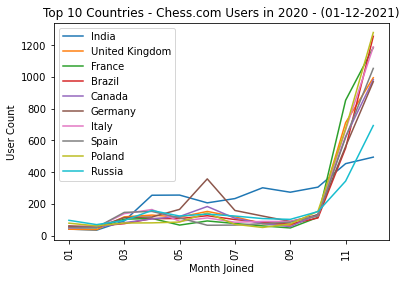

In [31]:
#TOP 10 COUNTRIES JOINDED DATA- 2020
groupby_yearmonth_2020_IN_count_df.plot()
groupby_yearmonth_2020_GB_count_df.plot()
groupby_yearmonth_2020_FR_count_df.plot()
groupby_yearmonth_2020_BR_count_df.plot()
groupby_yearmonth_2020_CA_count_df.plot()
groupby_yearmonth_2020_DE_count_df.plot()
groupby_yearmonth_2020_IT_count_df.plot()
groupby_yearmonth_2020_ES_count_df.plot()
groupby_yearmonth_2020_PL_count_df.plot()
groupby_yearmonth_2020_RU_count_df.plot()


file_created_datetime_CA = time.strftime('%m-%d-%Y', time.localtime(os.path.getctime(output_data_player_details_CA)))

plt.xticks(rotation=90)
plt.ylabel("User Count")
plt.xlabel("Month Joined")
plt.title(f"Top 10 Countries - Chess.com Users in 2020 - ({file_created_datetime_CA})")
plt.legend(['India', 'United Kingdom', 'France', 'Brazil', 'Canada', 'Germany', 'Italy', 'Spain', 'Poland', 'Russia'])
plt.savefig("figures/figure6_joineddate_2020", dpi=120)
plt.show()

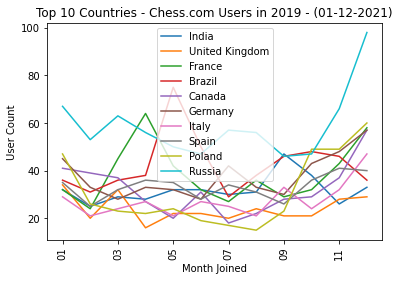

In [30]:
#TOP 10 COUNTRIES JOINED DATA - 2019
groupby_yearmonth_2019_IN_count_df.plot()
groupby_yearmonth_2019_GB_count_df.plot()
groupby_yearmonth_2019_FR_count_df.plot()
groupby_yearmonth_2019_BR_count_df.plot()
groupby_yearmonth_2019_CA_count_df.plot()
groupby_yearmonth_2019_DE_count_df.plot()
groupby_yearmonth_2019_IT_count_df.plot()
groupby_yearmonth_2019_ES_count_df.plot()
groupby_yearmonth_2019_PL_count_df.plot()
groupby_yearmonth_2019_RU_count_df.plot()


file_created_datetime_CA = time.strftime('%m-%d-%Y', time.localtime(os.path.getctime(output_data_player_details_CA)))

plt.xticks(rotation=90)
plt.ylabel("User Count")
plt.xlabel("Month Joined")
plt.title(f"Top 10 Countries - Chess.com Users in 2019 - ({file_created_datetime_CA})")
plt.legend(['India', 'United Kingdom', 'France', 'Brazil', 'Canada', 'Germany', 'Italy', 'Spain', 'Poland', 'Russia'])
plt.savefig("figures/figure7_joineddate_2019", dpi=120)
plt.show()